### Main Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split

## Loading The Datasets

In [2]:
df = pd.read_csv("D:\\Microsoft_Stock.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Prediction
0,4/1/2015 16:00,40.60,40.76,40.31,40.72,36865322.0,30.959999
1,4/2/2015 16:00,40.66,40.74,40.12,40.29,37487476.0,30.770000
2,4/6/2015 16:00,40.34,41.78,40.18,41.55,39223692.0,30.450001
3,4/7/2015 16:00,41.61,41.91,41.31,41.53,28809375.0,30.660000
4,4/8/2015 16:00,41.48,41.69,41.04,41.42,24753438.0,30.270000


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Prediction
3296,NaN,NaN,NaN,NaN,NaN,NaN,266.730011
3297,NaN,NaN,NaN,NaN,NaN,NaN,263.619995
3298,NaN,NaN,NaN,NaN,NaN,NaN,263.100006
3299,NaN,NaN,NaN,NaN,NaN,NaN,271.320007
3300,NaN,NaN,NaN,NaN,NaN,NaN,272.170013


In [4]:
df.shape

(3301, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3301 entries, 0 to 3300
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1511 non-null   object 
 1   Open        1511 non-null   float64
 2   High        1511 non-null   float64
 3   Low         1511 non-null   float64
 4   Close       1511 non-null   float64
 5   Volume      1511 non-null   float64
 6   Prediction  3301 non-null   float64
dtypes: float64(6), object(1)
memory usage: 180.6+ KB


### Check Null

In [6]:
##Check isnull or not
missing_values = df.isna().sum()
print(f"missing_values: \n {missing_values} ")

missing_values: 
 Date          1790
Open          1790
High          1790
Low           1790
Close         1790
Volume        1790
Prediction       0
dtype: int64 


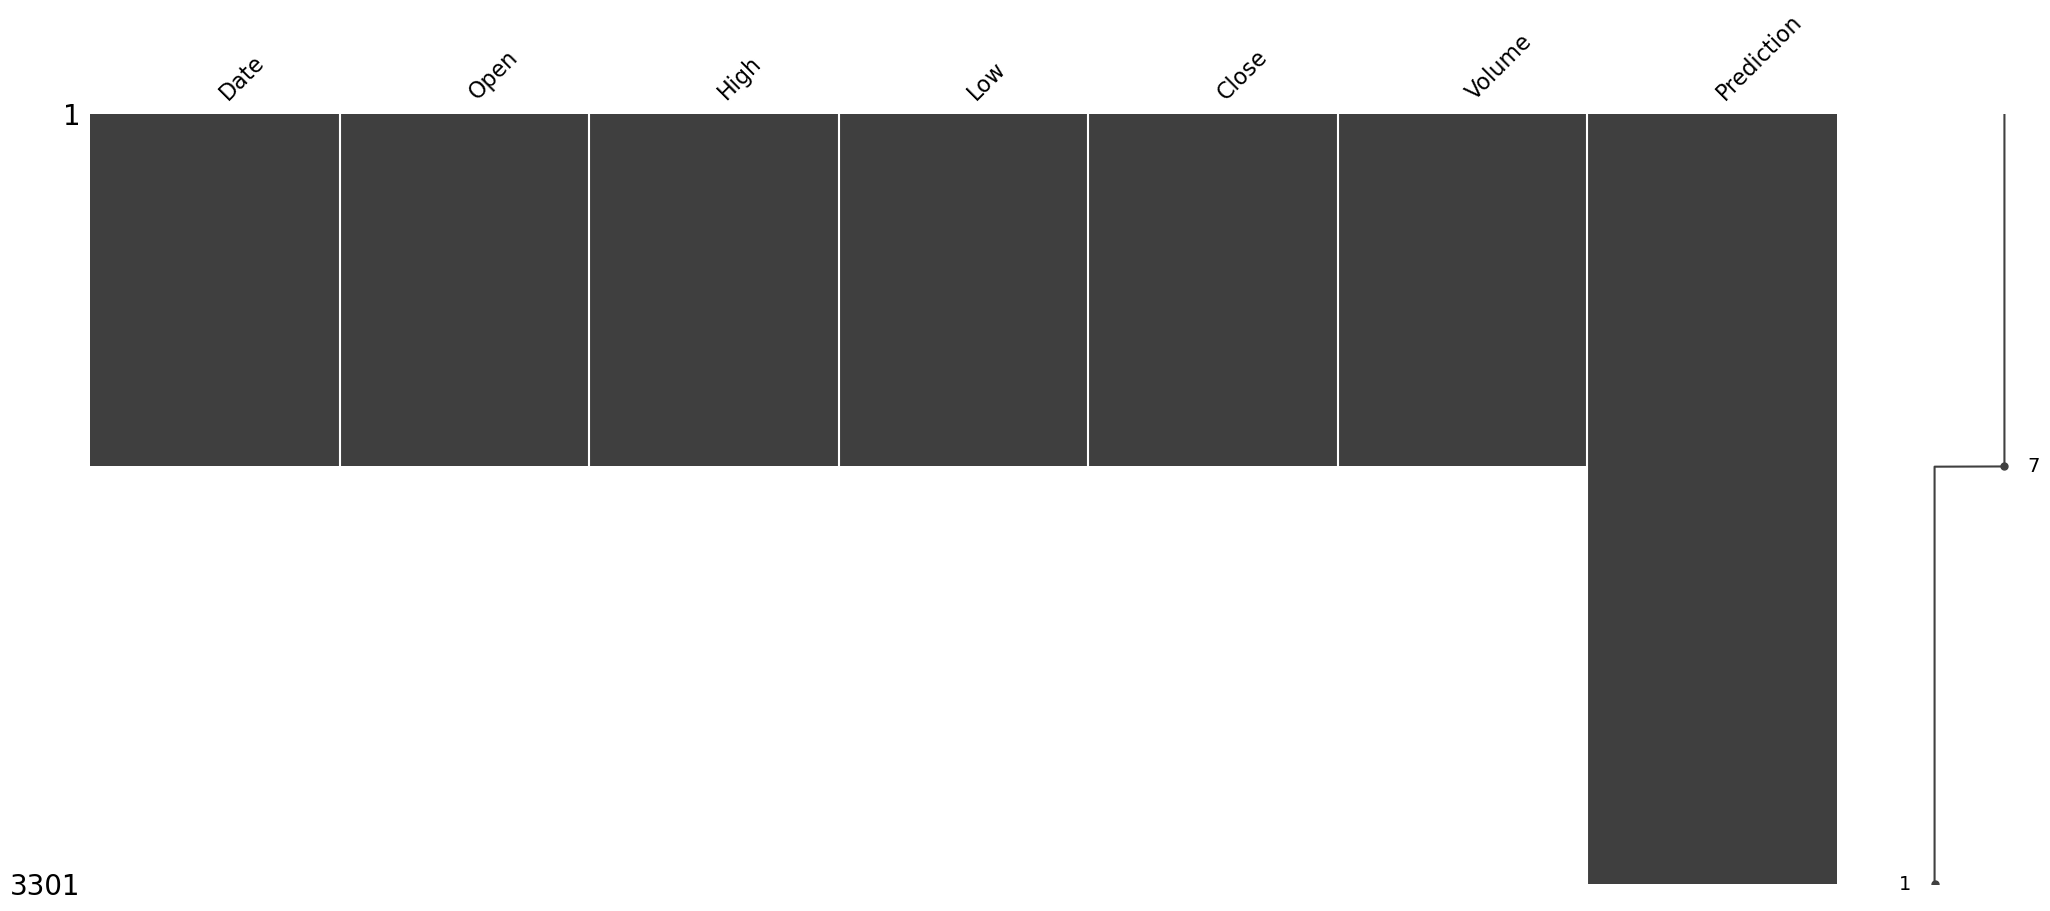

In [7]:
## check null in the gragh
mis.matrix(df)
plt.show()

In [8]:
df.describe()

,Open,High,Low,Close,Volume,Prediction
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03,3301.000000
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07,101.462914
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07,88.953592
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05,23.010000
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07,31.920000
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07,56.459999
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07,142.710007
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08,343.109985


In [9]:
## Show columns as a list
df.columns.tolist()

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Prediction']

### drop feature (Date)

In [10]:
df = df.drop(columns=["Date" , "Volume"] , axis=1)
df

,Open,High,Low,Close,Prediction
0,40.60,40.76,40.31,40.72,30.959999
1,40.66,40.74,40.12,40.29,30.770000
2,40.34,41.78,40.18,41.55,30.450001
3,41.61,41.91,41.31,41.53,30.660000
4,41.48,41.69,41.04,41.42,30.270000
...,...,...,...,...,...
3296,NaN,NaN,NaN,NaN,266.730011
3297,NaN,NaN,NaN,NaN,263.619995
3298,NaN,NaN,NaN,NaN,263.100006
3299,NaN,NaN,NaN,NaN,271.320007


In [11]:
## check duplicated values in data
df.duplicated().any() 

True

In [12]:
pd.DataFrame(df["Prediction"].describe())

,Prediction
count,3301.000000
mean,101.462914
std,88.953592
min,23.010000
25%,31.920000
50%,56.459999
75%,142.710007
max,343.109985


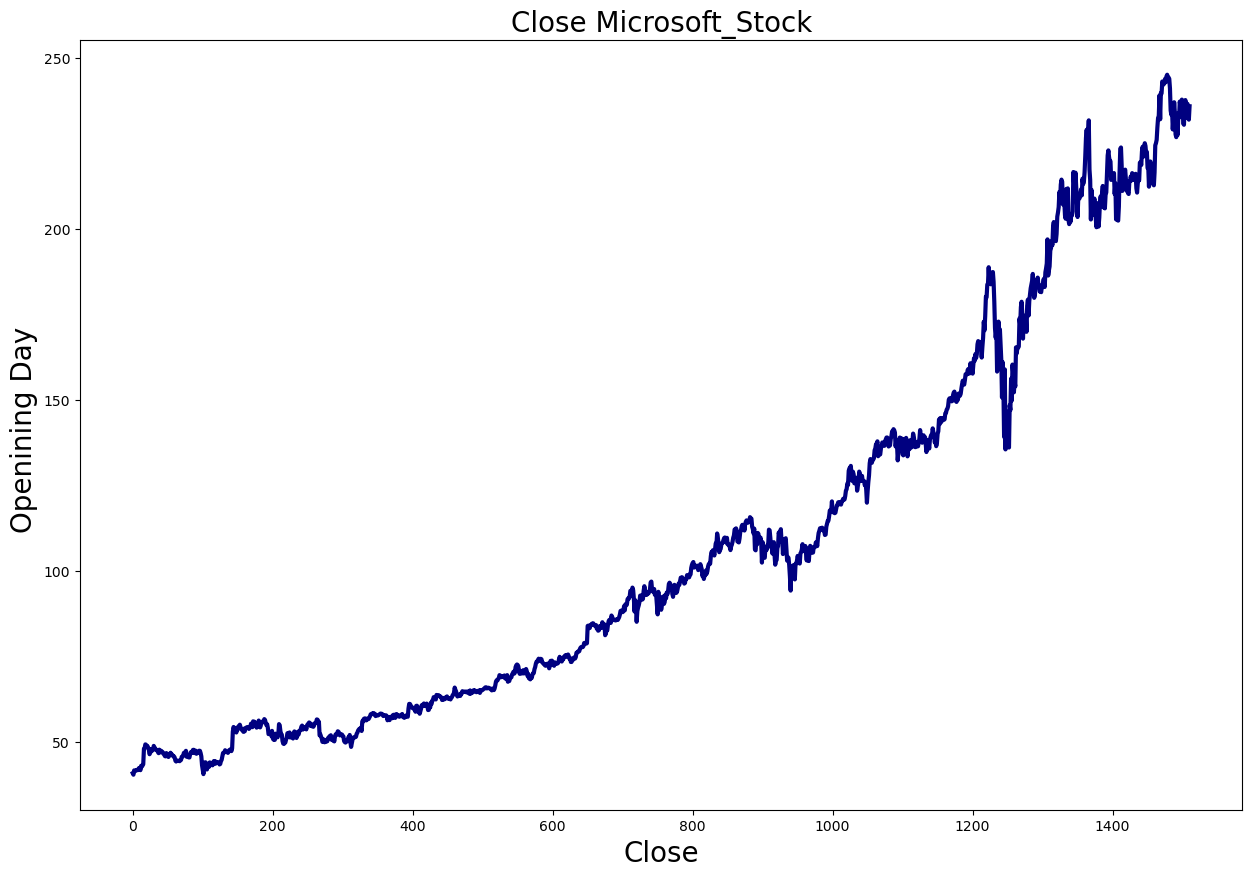

In [13]:
plt.figure(figsize=(15,10))
plt.title("Close Microsoft_Stock" , fontsize=20)
plt.xlabel("Close" , fontsize=20)
plt.ylabel("Openining Day ",fontsize=20)
plt.plot(df["Close"] , color="navy" , lw=3)
plt.show()

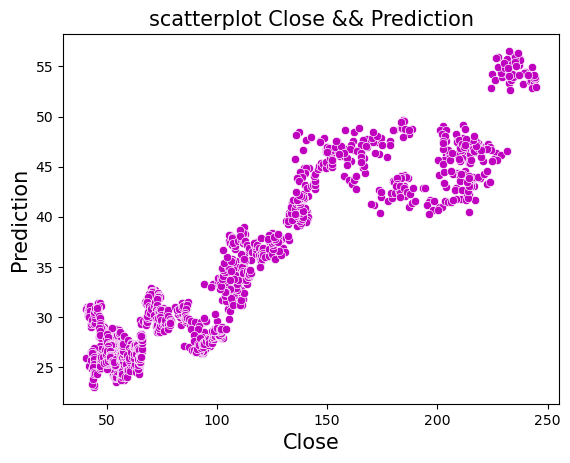

In [14]:
sns.scatterplot(data=df , x="Close" , y="Prediction" , color="m")
plt.title("scatterplot Close && Prediction" , fontsize=15)
plt.xlabel("Close" , fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()

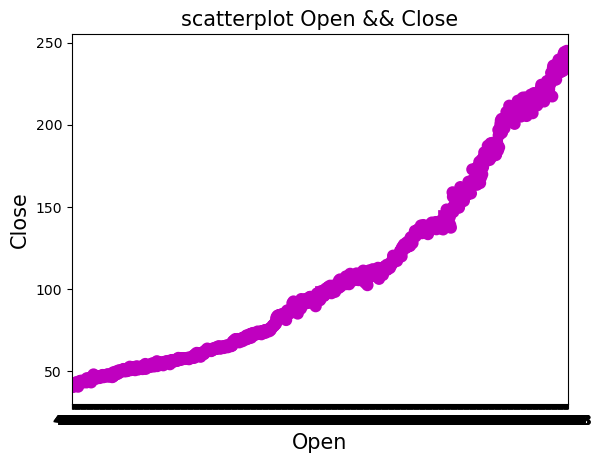

In [15]:
sns.pointplot(data=df , x="Open" , y="Close" , color="m")
plt.title("scatterplot Open && Close" , fontsize=15)
plt.xlabel("Open" , fontsize=15)
plt.ylabel("Close",fontsize=15)
plt.show()

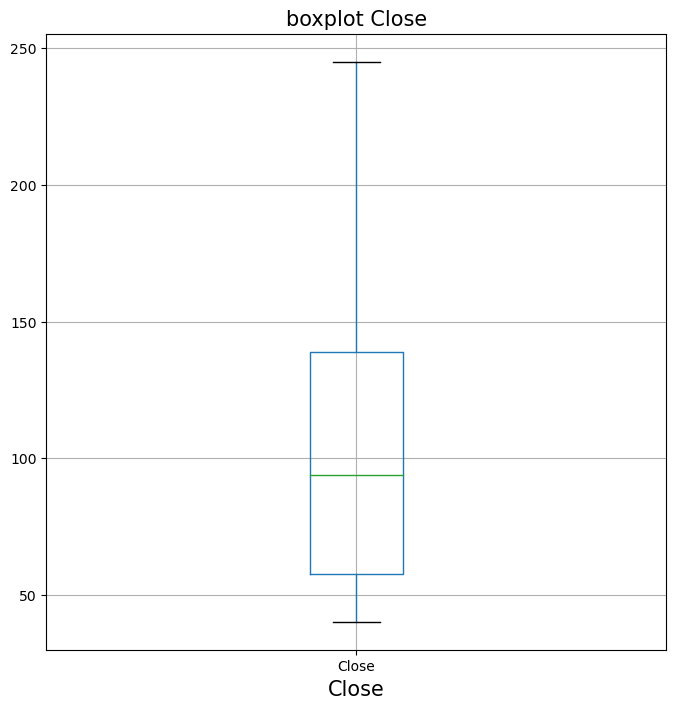

In [16]:
df.boxplot(column=['Close'], figsize=(8,8) , color="")
plt.title("boxplot Close" , fontsize=15)
plt.xlabel("Close" , fontsize=15)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7872\281350610.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Prediction"])


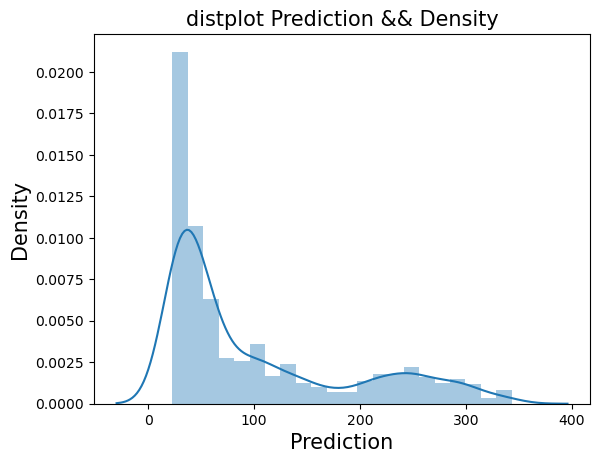

In [17]:
sns.distplot(df["Prediction"])
plt.title("distplot Prediction && Density" , fontsize=15)
plt.xlabel("Prediction" , fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

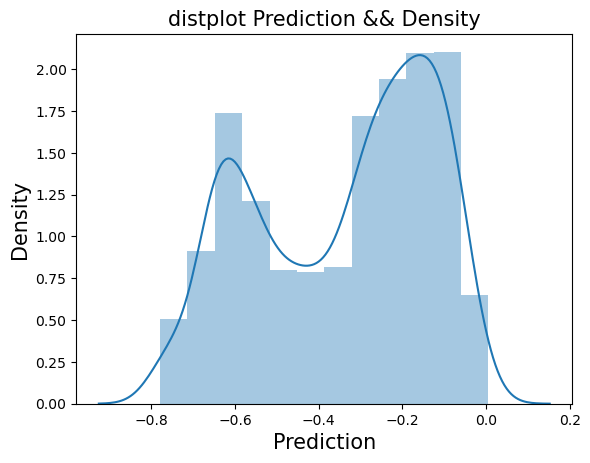

In [58]:
sns.distplot(np.sin(df["Prediction"]))
plt.title("distplot Prediction && Density" , fontsize=15)
plt.xlabel("Prediction" , fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.show()

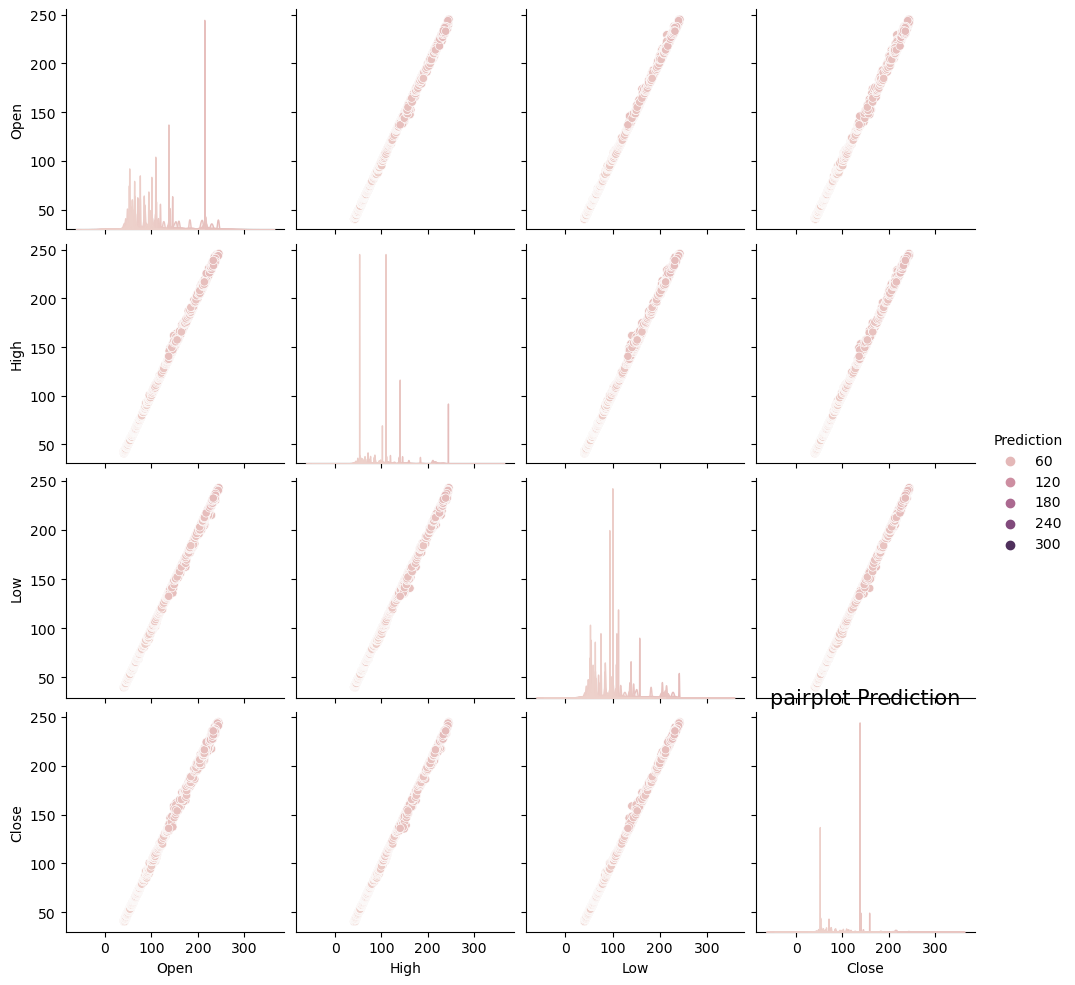

In [19]:
sns.pairplot(df, hue = "Prediction",diag_kind="kde" )
plt.title("pairplot Prediction" , fontsize=15)
plt.show()

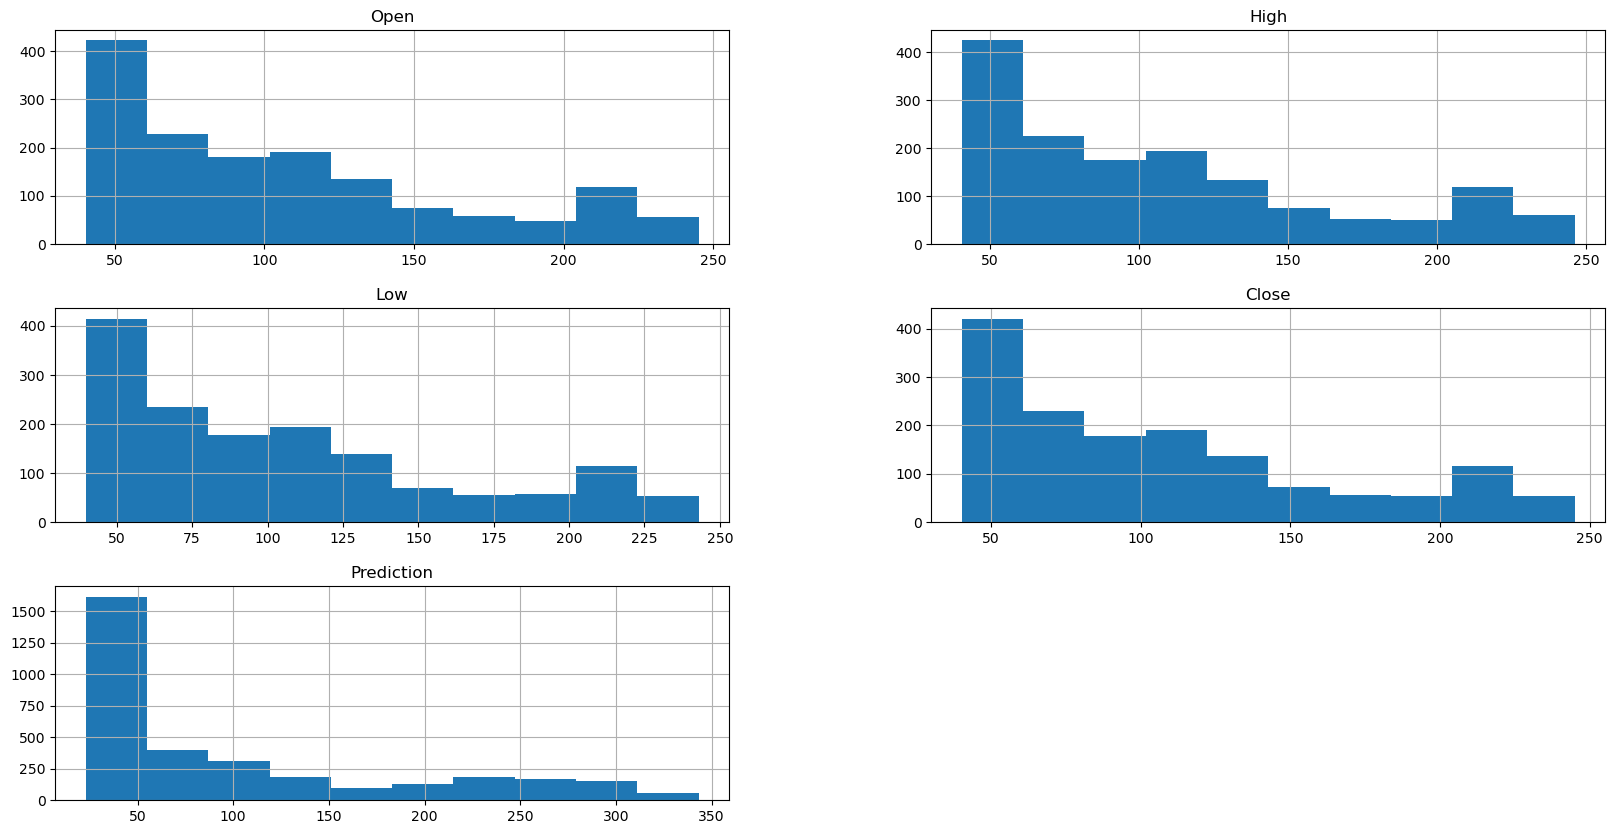

In [20]:
### histogram
df.hist(figsize=(20,10))
plt.show()

### solve skewed 

In [21]:
cols = [col for col in df.columns]
cols

['Open', 'High', 'Low', 'Close', 'Prediction']

In [22]:
cols = [col for col in df.columns]
for col in cols:
    df[col] = np.log(df[col] + 1e-10).astype(float)

## After Skewed 

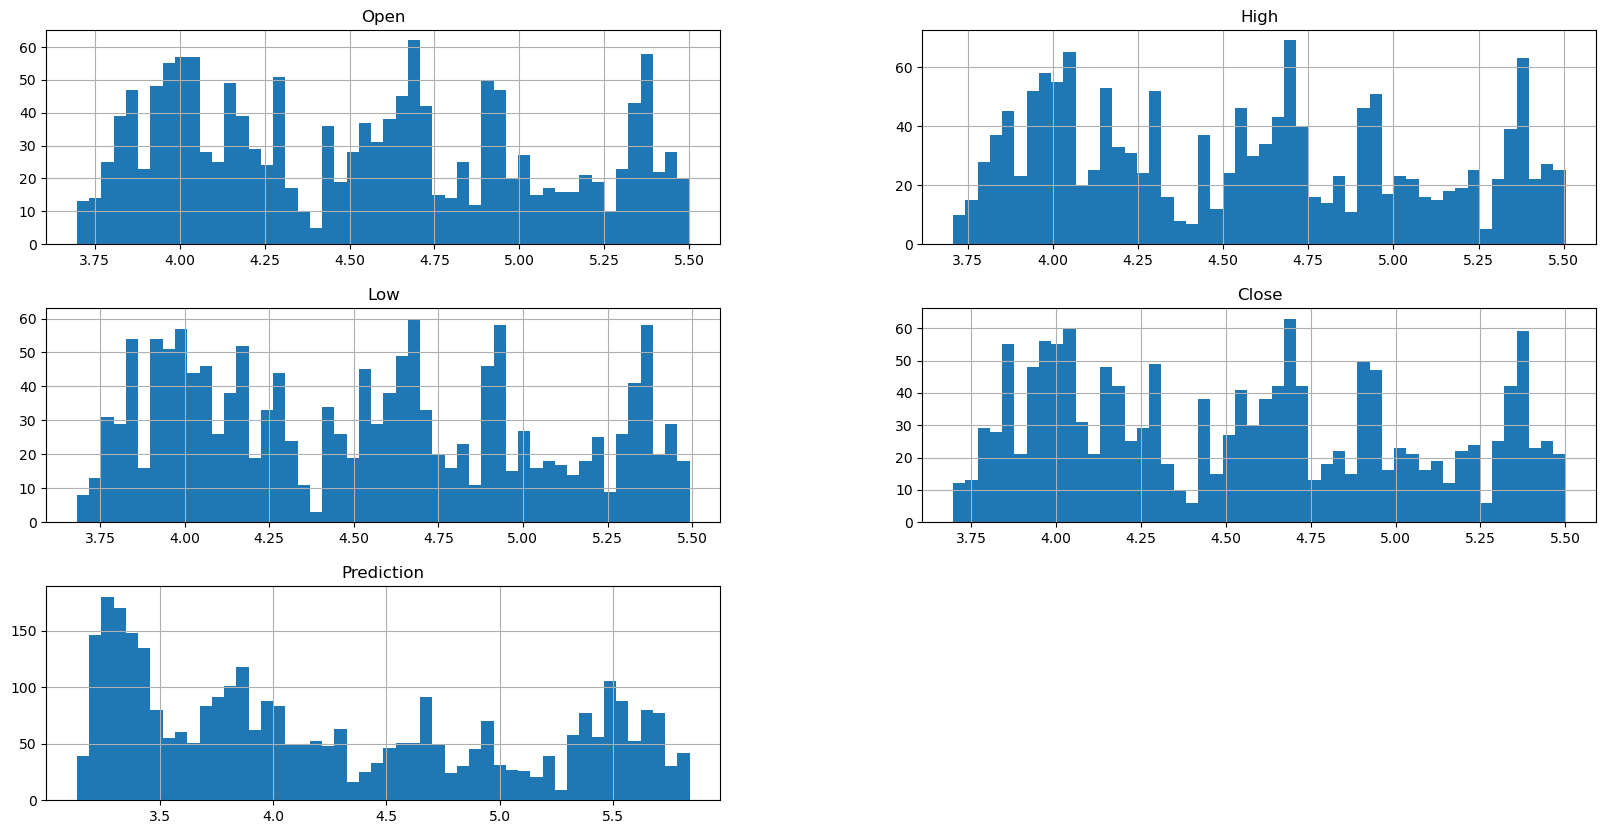

In [23]:
### histogram
df.hist(figsize=(20,10), bins=50)
plt.show()

## Drop NaN

In [24]:
df = df.dropna()
df

,Open,High,Low,Close,Prediction
0,3.703768,3.707701,3.696600,3.706719,3.432696
1,3.705245,3.707210,3.691875,3.696103,3.426540
2,3.697344,3.732418,3.693369,3.726898,3.416086
3,3.728341,3.735524,3.721105,3.726416,3.422959
4,3.725211,3.730261,3.714547,3.723764,3.410157
...,...,...,...,...,...
1506,5.460861,5.467807,5.444882,5.448202,4.035125
1507,5.444796,5.466836,5.444796,5.465864,4.030872
1508,5.466329,5.467216,5.446220,5.460606,4.016023
1509,5.453311,5.454680,5.442851,5.446091,4.003690


In [25]:
X = df.drop(columns=["Prediction"] , axis=1)

y = df["Prediction"]

In [26]:
# df.shape  100% , X_train.shape  85%   , y_test.shape  15%

### Split the dataset

In [27]:
X_train_full , X_test , y_train_full , y_test = train_test_split(X , y , random_state=123 , test_size=0.15 , shuffle=True)


In [28]:
## check shape
print("X_train_full shape --<<<--",X_train_full.shape)
print("X_test shape --<<<--",X_test.shape)
print("y_train_full shape --<<<--",y_train_full.shape)
print("y_test shape --<<<--",y_test.shape)

X_train_full shape --<<<-- (1284, 4)
X_test shape --<<<-- (227, 4)
y_train_full shape --<<<-- (1284,)
y_test shape --<<<-- (227,)


In [29]:
## Train and Valid datasets
X_train , X_valid ,y_train , y_valid =  train_test_split(X_train_full, y_train_full ,test_size=0.15 ,random_state=123)

In [30]:
## check shape
print("X_train shape --<<<--",X_train.shape)
print("X_valid shape --<<<--",X_valid.shape)
print("y_train shape --<<<--",y_train.shape)
print("y_test shape --<<<--",y_valid.shape)

X_train shape --<<<-- (1091, 4)
X_valid shape --<<<-- (193, 4)
y_train shape --<<<-- (1091,)
y_test shape --<<<-- (193,)


### warnings

In [31]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [32]:
##preprocessing
# impute
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# pipeline
from sklearn.pipeline import Pipeline

from sklearn_features.transformers import DataFrameSelector 

## Model ml 
## linear
from sklearn.linear_model import LinearRegression , ElasticNet, SGDRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn.model_selection import GridSearchCV

## ensemble
from sklearn.ensemble import RandomForestRegressor 


In [33]:
df.corr()

,Open,High,Low,Close,Prediction
Open,1.000000,0.999845,0.999828,0.999687,0.910774
High,0.999845,1.000000,0.999733,0.999818,0.911457
Low,0.999828,0.999733,1.000000,0.999839,0.910620
Close,0.999687,0.999818,0.999839,1.000000,0.911117
Prediction,0.910774,0.911457,0.910620,0.911117,1.000000


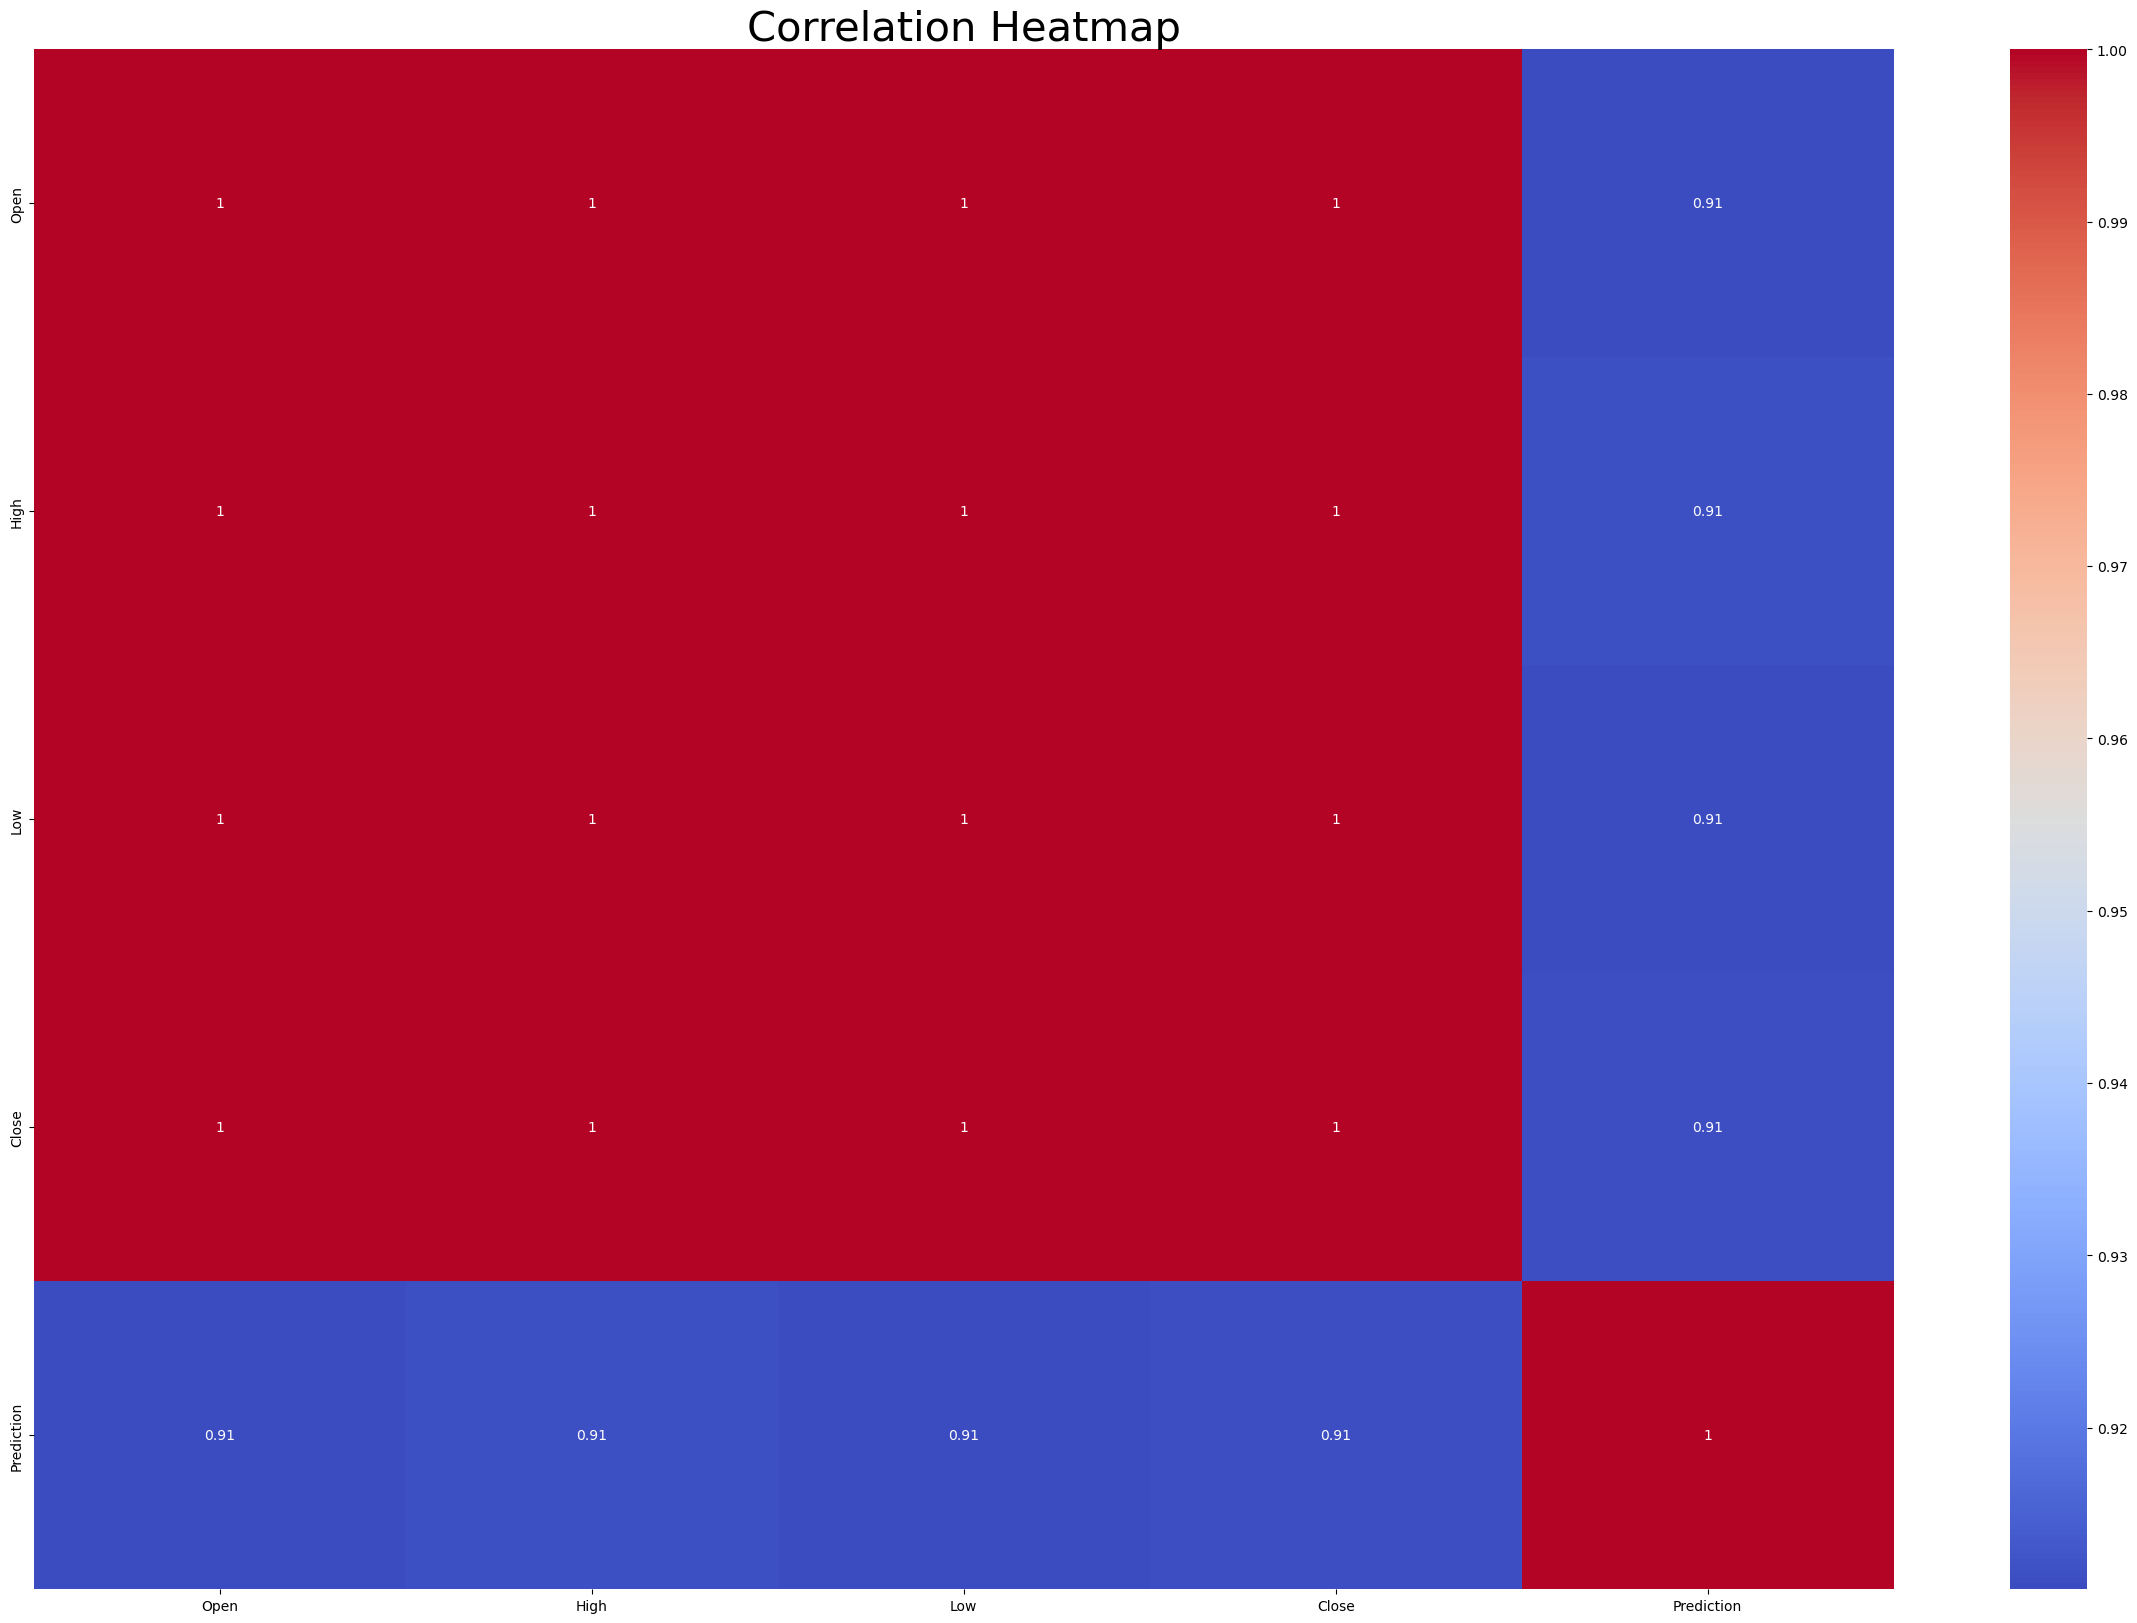

In [34]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr() , annot=True  , cbar=True ,cmap="coolwarm")
plt.title("Correlation Heatmap" , fontsize=30)
plt.show()

In [35]:
## shuffle datasets
df = shuffle(df)
df

,Open,High,Low,Close,Prediction
1146,4.939927,4.941642,4.916764,4.922969,3.795489
1149,4.919105,4.923260,4.909783,4.921731,3.774598
435,4.154028,4.155753,4.143611,4.151670,3.236323
749,4.513822,4.519067,4.496025,4.497474,3.290638
465,4.151040,4.154185,4.144245,4.153871,3.288402
...,...,...,...,...,...
1478,5.496881,5.502482,5.491950,5.501217,3.969726
1178,5.011568,5.011835,5.005288,5.009635,3.846738
483,4.169607,4.170534,4.157006,4.159039,3.227637
695,4.455045,4.460260,4.453998,4.458409,3.396185


### Numerical cols

In [36]:
nums = [col for col in X.columns if df[col].dtype in ["float64" , "int64" , "int32" , "float32"] ]
nums

['Open', 'High', 'Low', 'Close']

## check if find Categorical Values or not

### Categorical cols

In [37]:
catg = [col for col in X.columns if df[col].dtype not in ["float64" , "int64" , "int32" , "float32"] ]
catg

[]

In [38]:
## Numerical pipeline 
pip_num = Pipeline(steps=[("select",DataFrameSelector(nums)),
                            ("Simple",SimpleImputer(strategy="median")),
                          ("scaler", StandardScaler())])

X_train_final = pip_num.fit_transform(X_train[nums])
X_valid_final = pip_num.transform(X_valid[nums])
X_test_final = pip_num.transform(X_test[nums])

### Building Model ML

## 1.LinearRegression

In [39]:
linear = LinearRegression()
linear.fit(X_train_final , y_train)


LinearRegression()

In [40]:
y_pred = linear.predict(X_train_final)
y_pred

array([3.85780068, 3.88347202, 3.51993854, ..., 3.70893002, 3.27307623,
       3.4068392 ])

In [41]:
mse =(mean_squared_error(y_train , y_pred))**0.5
print(f"mean squared error is == {mse}")


mean squared error is == 0.09678280587768313


In [42]:
print(f"score train is =======> {linear.score(X_train_final , y_train)}")
print("score test is =======>",linear.score(X_test_final,y_test))

score train is =======> 0.8295263194896081
score test is =======> 0.8341062966029653


In [43]:
elet = ElasticNet()

# Define the hyperparameter grid
hyper_params = {
    "l1_ratio": [0,1,2,3,4,5],
    "alpha": [0.1,0.2,0 , -0.3,0.4,0.5],
    "max_iter": [2000,100,4000,5000],
    "tol" : [0 , 0.1,0.2,0.3,0.4,0.5]
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    elet,
    hyper_params,
    scoring="neg_root_mean_squared_error",
    cv=3
)

# Fit the model
random_model = random_hyper.fit(X_train_final, y_train)


In [44]:
print(f"The best paramter : \n{random_model.best_params_}")

The best paramter : 
{'alpha': 0, 'l1_ratio': 0, 'max_iter': 5000, 'tol': 0}


### 2.ElasticNet

In [45]:
enet = ElasticNet(alpha =random_model.best_params_["alpha"],
                  l1_ratio=random_model.best_params_["l1_ratio"],
                  max_iter= random_model.best_params_["max_iter"],
                  tol= random_model.best_params_["tol"])
enet.fit(X_train_final , y_train)

ElasticNet(alpha=0, l1_ratio=0, max_iter=5000, tol=0)

In [46]:
print("score train is ==>",enet.score(X_train_final , y_train))
print("score test is ==>",enet.score(X_test_final,y_test))

score train is ==> 0.8293404989763632
score test is ==> 0.8341126970466155


## 3.SGDRegressor

In [47]:
sgd = SGDRegressor(  alpha=0.1 , l1_ratio=0.1 ,max_iter=10000)
sgd.fit(X_train_final , y_train)

SGDRegressor(alpha=0.1, l1_ratio=0.1, max_iter=10000)

In [48]:
print("score train ==>>> ",sgd.score(X_train_final , y_train))
print("score test ==>>> ",sgd.score(X_test_final,y_test))

score train ==>>>  0.8275738031931826
score test ==>>>  0.832053577447479


In [49]:
random_forest = RandomForestRegressor()

# Define the hyperparameter grid
hyper_params = {
    "n_estimators": [200, 300, 400],
    "max_depth": [3,4,5,6,7,8],
    "criterion": ["squared_error", "absolute_error", "friedman_mse", "poisson"]
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    random_forest,
    hyper_params,
    scoring="neg_root_mean_squared_error",
    cv=2
)

# Fit the model
random_model = random_hyper.fit(X_train_final, y_train)


## check the best model

In [50]:
print(f"The best paramter : \n{random_model.best_params_}")

The best paramter : 
{'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 400}


## best error

In [51]:
print(f"Best Error is == {random_model.best_score_}")

Best Error is == -0.0516882061526564


In [52]:
mylist = ["Open" , "High" , "Low" , "Close" , "volume"]
importance = random_model.best_estimator_.feature_importances_
# print(importance)
# print(mylist)
names = X_train.columns.tolist()
print("names" , names)
for _ in range(X_train.shape[1]):
    print((names[_] , importance[[_]]))

names ['Open', 'High', 'Low', 'Close']
('Open', array([0.13274261]))
('High', array([0.22740602]))
('Low', array([0.41151618]))
('Close', array([0.22833519]))


## 3.RandoForstRegressor

In [53]:
# criterion='absolute_error', max_depth=3, n_estimators=200

In [54]:
random = RandomForestRegressor(criterion=random_model.best_params_["criterion"] , 
                               max_depth=random_model.best_params_["max_depth"] ,
                               n_estimators=random_model.best_params_["n_estimators"])

random.fit(X_train_final , y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=400)

In [55]:
print("score of train ====>>>",random.score(X_train_final , y_train))
print("score of test ====>>>",random.score(X_test_final,y_test))

score of train ====>>> 0.9645753669178504
score of test ====>>> 0.9536434308815345


In [56]:
y_pred = random.predict(X_train_final)
y_pred

array([3.85486959, 4.00439813, 3.34219674, ..., 3.83137801, 3.24277521,
       3.41521992])

In [57]:
mse =(mean_squared_error(y_train , y_pred))**0.5
print(f"mean squared error is == {mse}")

mean squared error is == 0.04411865055320931


## End